In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
text="I never thought through love we'd be. Making one as lovely as she. But isn't she lovely made from love." # corpus


In [3]:
# 문장단위로 텍스트 분할
from nltk.tokenize import sent_tokenize

t = sent_tokenize(text)
t

["I never thought through love we'd be.",
 'Making one as lovely as she.',
 "But isn't she lovely made from love."]

In [4]:
# 단어 사전을 먼저 만들기.
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

In [5]:
tokenizer.fit_on_texts(t)
tokenizer.word_index

{'love': 1,
 'as': 2,
 'lovely': 3,
 'she': 4,
 'i': 5,
 'never': 6,
 'thought': 7,
 'through': 8,
 "we'd": 9,
 'be': 10,
 'making': 11,
 'one': 12,
 'but': 13,
 "isn't": 14,
 'made': 15,
 'from': 16}

In [6]:
tokenizer.word_counts

OrderedDict([('i', 1),
             ('never', 1),
             ('thought', 1),
             ('through', 1),
             ('love', 2),
             ("we'd", 1),
             ('be', 1),
             ('making', 1),
             ('one', 1),
             ('as', 2),
             ('lovely', 2),
             ('she', 2),
             ('but', 1),
             ("isn't", 1),
             ('made', 1),
             ('from', 1)])

In [7]:
corpus = ["I don't think that I like her any more.."]
tokenizer.texts_to_sequences(corpus)

[[5, 5]]

In [8]:
tokenizer.sequences_to_texts([[5, 5]])

['i i']

In [9]:
# tf-idf
## tf = term-frequency (한 문장에 등장한 횟수)
## idf = Inverse-Document-frequency = 1/df
## tf*idf = 한문장에 등장한 횟수가 많은 단어일 수록 good. 그러나 많은 문서에 등장했다면
##          그 단어는 그리 중요도가 높지 않다고 생각되는 것?



In [10]:
lyrics1 = '''Get her name and get her number
Find out all of the things that we have in common
Never all the differences, oh yeah
Meet her parents, meet her brother
Then she starts sleepin' over the crib on weekends
Like a real relationship, oh no
For me, the stars are alignin'
But for her it's bad timin'
So she just can't be mine
I don't think that I like her anymore
Girls are all the same
All they wanna do is break my heart, my heart, ah-ah
I don't think that I like her anymore
Girls are all the same
They just wanna see me fall apart, apart, ah-ah
So I hook up on a rebound
And I say that I'm gonna be single for life
But she's so pretty and nice (pretty and nice)
So I make just one exception
But I find out eventually I'm not her type
Baby, that's the reason why, that
For me, the stars are alignin'
But for her, it's bad timin'
So she just can't be mine
I don't think that I like her anymore (yeah)
Girls are all the same
All they wanna do is break my heart, my heart, ah-ah
I don't think that I like her anymore (no)
Girls are all the same
They just wanna see me fall apart, apart, ah-ah
I'm trying not to be bitter
But damn it, I miss her
'Cause she's one of a kind (one of a kind)
For me, the stars are alignin'
But for her, it's bad timin'
So she just can't be mine
I don't think that I like her anymore
Girls are all the same
All they wanna do is break my heart, my heart, ah-ah
I don't think that I like her anymore
Girls are all the same
They just wanna see me fall apart, apart, ah-ah
Then we fall, fall, fall, fall apart now
I don't think that I like her anymore
Girls are all the same
They just wanna see me fall apart, apart, ah-ah'''

lyrics2='''Oh, I'm such a loser
How'd I ever lose her?
Oh, maybe I must have been out of my mind
Now I'm a loser, why'd I have to lose her?
I'll never recover, I'll never be fine, 'cause I
I just might get a little too drunk, so I won't think about us
I don't think about what we could have been
And I stay up like three or four nights so I won't dream about us
Wake up with no luck
I just can't win
I should have seen it all along (ah)
She was one in a million (ah)
It hurts whenever someone says her name (someone says her name)
When we were going off and on (ah)
I guess I really played it wrong (ah)
I should have never let her slip away
Oh, I'm such a loser
How'd I ever lose her?
Oh, maybe I must have been out of my mind
Now I'm a loser, why'd I have to lose her?
I'll never recover, I'll never be fine, 'cause I
I just might been a little too gone when she needed somebody
Up against her body (oh-oh) at 2 am
Yeah, and now I keep lying to myself when she's just joking probably
(She's joking probably)
She'll probably call me and we'll be us again
I should have seen it all along (ah)
She was one in a million (ah)
Now she's in love and I'm in second place (damn)
Oh, I'm such a loser
How'd I ever lose her? (Lose her)
Oh, maybe I must have been out of my mind
Now I'm a loser, why'd I have to lose her?
I'll never recover, I'll never be fine (fine), 'cause I
Oh my, my, my, my
Oh my, my, my, my
Oh my, my, my, my, I'm a loser
(I say) oh my, my, my, my
Oh my, my, my, my
Oh my, my, my, my, I'm a loser
Tell me, God is real
Do you think about me still
Or am I living for nothing?
Don't know where it went wrong but I'll just take the hint
It's gonna take some adjusting
Oh, I'm such a loser
How'd I ever lose her?
Oh, maybe I must have been out of my mind
Now I'm a loser, why'd I have to lose her? (I'll never)
I'll never recover, I'll never be fine, 'cause I
I'm a loser
Oh my, my, my, my
Oh my, my, my, my
Oh my, my, my, my, I'm a loser (I say)
Oh my, my, my, my (oh, I say)
Oh my, my, my, my (and I say)
Oh my, my, my, my, I'm a loser'''

In [11]:
# DTM(Document Term Matrix)
corpus_charlie = [lyrics1, lyrics2]
corpus_charlie

["Get her name and get her number\nFind out all of the things that we have in common\nNever all the differences, oh yeah\nMeet her parents, meet her brother\nThen she starts sleepin' over the crib on weekends\nLike a real relationship, oh no\nFor me, the stars are alignin'\nBut for her it's bad timin'\nSo she just can't be mine\nI don't think that I like her anymore\nGirls are all the same\nAll they wanna do is break my heart, my heart, ah-ah\nI don't think that I like her anymore\nGirls are all the same\nThey just wanna see me fall apart, apart, ah-ah\nSo I hook up on a rebound\nAnd I say that I'm gonna be single for life\nBut she's so pretty and nice (pretty and nice)\nSo I make just one exception\nBut I find out eventually I'm not her type\nBaby, that's the reason why, that\nFor me, the stars are alignin'\nBut for her, it's bad timin'\nSo she just can't be mine\nI don't think that I like her anymore (yeah)\nGirls are all the same\nAll they wanna do is break my heart, my heart, ah-ah

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cnt1 = CountVectorizer()
cnt1.fit(corpus_charlie)

CountVectorizer()

In [13]:
feature_vector1 = cnt1.transform(corpus_charlie)
feature_vector1.toarray()

array([[ 0,  0,  0,  0, 14,  3, 12,  0,  0,  4,  7,  9, 10,  0,  0,  1,
         3,  5,  0,  1,  0,  3,  1,  6,  0,  3,  1,  1,  0,  1,  1,  1,
         3,  7,  0,  0,  1,  0,  1,  8,  2,  0,  7,  0,  2,  7,  0,  0,
         0,  1,  0,  1,  6, 16,  0,  1,  0,  0,  1,  3,  4,  0,  8,  0,
         2,  0,  0,  1,  8,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  7,
         2,  0,  0,  0,  3,  1,  0,  6,  0,  1,  0,  1,  2,  0,  2,  2,
         0,  1,  1,  3,  0,  2,  2,  3,  0,  2,  1,  1,  0,  0,  2,  0,
         1,  0,  1,  1,  0,  1,  7,  1,  0,  0,  4,  0,  6,  0,  1,  1,
         0,  6,  0,  0,  0,  3,  1,  0,  0,  0,  0,  0, 11, 14,  2,  7,
         1,  7,  0,  3,  1,  0,  1,  1,  1,  0,  0,  7,  0,  2,  1,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  2,  0],
       [ 4,  1,  1,  1,  6,  0,  2,  2,  2,  6,  0,  0,  0,  1,  1,  0,
         0,  5,  6,  0,  1,  0,  0,  1,  1,  1,  4,  0,  1,  0,  1,  0,
         1,  2,  1,  1,  0,  4,  0,  0,  0,  5,  1,  1,  1,  0,  1,  1,
       

In [14]:
vocabs = sorted(cnt1.vocabulary_.items())
vocabs

[('about', 0),
 ('adjusting', 1),
 ('again', 2),
 ('against', 3),
 ('ah', 4),
 ('alignin', 5),
 ('all', 6),
 ('along', 7),
 ('am', 8),
 ('and', 9),
 ('anymore', 10),
 ('apart', 11),
 ('are', 12),
 ('at', 13),
 ('away', 14),
 ('baby', 15),
 ('bad', 16),
 ('be', 17),
 ('been', 18),
 ('bitter', 19),
 ('body', 20),
 ('break', 21),
 ('brother', 22),
 ('but', 23),
 ('call', 24),
 ('can', 25),
 ('cause', 26),
 ('common', 27),
 ('could', 28),
 ('crib', 29),
 ('damn', 30),
 ('differences', 31),
 ('do', 32),
 ('don', 33),
 ('dream', 34),
 ('drunk', 35),
 ('eventually', 36),
 ('ever', 37),
 ('exception', 38),
 ('fall', 39),
 ('find', 40),
 ('fine', 41),
 ('for', 42),
 ('four', 43),
 ('get', 44),
 ('girls', 45),
 ('god', 46),
 ('going', 47),
 ('gone', 48),
 ('gonna', 49),
 ('guess', 50),
 ('have', 51),
 ('heart', 52),
 ('her', 53),
 ('hint', 54),
 ('hook', 55),
 ('how', 56),
 ('hurts', 57),
 ('in', 58),
 ('is', 59),
 ('it', 60),
 ('joking', 61),
 ('just', 62),
 ('keep', 63),
 ('kind', 64),
 ('know

In [15]:
vocabs_item = [item[0] for item in vocabs]
vocabs_item

['about',
 'adjusting',
 'again',
 'against',
 'ah',
 'alignin',
 'all',
 'along',
 'am',
 'and',
 'anymore',
 'apart',
 'are',
 'at',
 'away',
 'baby',
 'bad',
 'be',
 'been',
 'bitter',
 'body',
 'break',
 'brother',
 'but',
 'call',
 'can',
 'cause',
 'common',
 'could',
 'crib',
 'damn',
 'differences',
 'do',
 'don',
 'dream',
 'drunk',
 'eventually',
 'ever',
 'exception',
 'fall',
 'find',
 'fine',
 'for',
 'four',
 'get',
 'girls',
 'god',
 'going',
 'gone',
 'gonna',
 'guess',
 'have',
 'heart',
 'her',
 'hint',
 'hook',
 'how',
 'hurts',
 'in',
 'is',
 'it',
 'joking',
 'just',
 'keep',
 'kind',
 'know',
 'let',
 'life',
 'like',
 'little',
 'living',
 'll',
 'lose',
 'loser',
 'love',
 'luck',
 'lying',
 'make',
 'maybe',
 'me',
 'meet',
 'might',
 'million',
 'mind',
 'mine',
 'miss',
 'must',
 'my',
 'myself',
 'name',
 'needed',
 'never',
 'nice',
 'nights',
 'no',
 'not',
 'nothing',
 'now',
 'number',
 'of',
 'off',
 'oh',
 'on',
 'one',
 'or',
 'out',
 'over',
 'parent

In [16]:
len(vocabs_item)

172

In [17]:
len(feature_vector1.toarray()[0])

172

In [18]:
feature_vector1.toarray()

import pandas as pd

charlie_df = pd.DataFrame(columns = vocabs_item, data = feature_vector1.toarray())

In [19]:
charlie_df

,about,adjusting,again,against,ah,alignin,all,along,am,and,...,when,whenever,where,why,win,with,won,wrong,yeah,you
0,0,0,0,0,14,3,12,0,0,4,...,0,0,0,1,0,0,0,0,2,0
1,4,1,1,1,6,0,2,2,2,6,...,3,1,1,4,1,1,2,2,1,1


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
feature_vect2 = tfidf_vect.fit_transform(corpus_charlie)

tfidf_vect.vocabulary_.items()

dict_items([('get', 44), ('her', 53), ('name', 89), ('and', 9), ('number', 98), ('find', 40), ('out', 105), ('all', 6), ('of', 99), ('the', 141), ('things', 144), ('that', 140), ('we', 157), ('have', 51), ('in', 58), ('common', 27), ('never', 91), ('differences', 31), ('oh', 101), ('yeah', 170), ('meet', 80), ('parents', 107), ('brother', 22), ('then', 142), ('she', 124), ('starts', 134), ('sleepin', 127), ('over', 106), ('crib', 29), ('on', 102), ('weekends', 158), ('like', 68), ('real', 112), ('relationship', 117), ('no', 94), ('for', 42), ('me', 79), ('stars', 133), ('are', 12), ('alignin', 5), ('but', 23), ('it', 60), ('bad', 16), ('timin', 147), ('so', 129), ('just', 62), ('can', 25), ('be', 17), ('mine', 84), ('don', 33), ('think', 145), ('anymore', 10), ('girls', 45), ('same', 118), ('they', 143), ('wanna', 155), ('do', 32), ('is', 59), ('break', 21), ('my', 87), ('heart', 52), ('ah', 4), ('see', 122), ('fall', 39), ('apart', 11), ('hook', 55), ('up', 152), ('rebound', 115), ('s

In [21]:

vocabs2 = sorted(tfidf_vect.vocabulary_.items())
vocabs2_item = [item[0] for item in vocabs2]

charlie_tf_df = pd.DataFrame(columns = vocabs2_item, data = feature_vect2.toarray())
charlie_tf_df

,about,adjusting,again,against,ah,alignin,all,along,am,and,...,when,whenever,where,why,win,with,won,wrong,yeah,you
0,0.000000,0.00000,0.00000,0.00000,0.258904,0.077974,0.221918,0.000000,0.000000,0.073973,...,0.000000,0.00000,0.00000,0.018493,0.00000,0.00000,0.000000,0.000000,0.036986,0.00000
1,0.075681,0.01892,0.01892,0.01892,0.080772,0.000000,0.026924,0.037841,0.037841,0.080772,...,0.056761,0.01892,0.01892,0.053848,0.01892,0.01892,0.037841,0.037841,0.013462,0.01892


<Axes: >

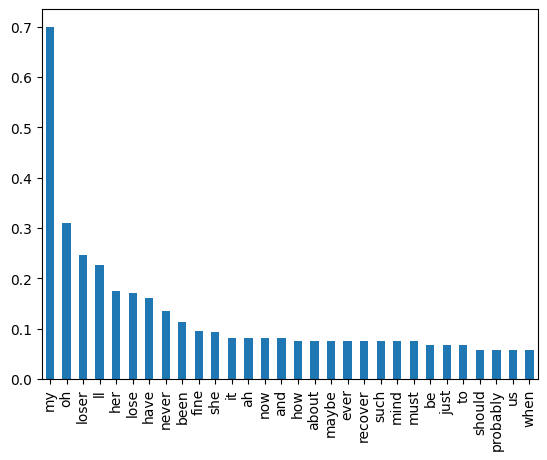

In [22]:
loser = charlie_tf_df.T.sort_values(by=1, ascending=False)
loser[1][:30].plot(kind='bar')


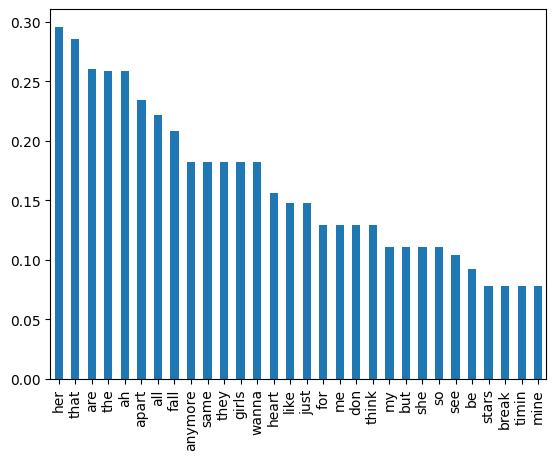

In [23]:
import matplotlib.pyplot as plt
idontthink = charlie_tf_df.T.sort_values(by=0, ascending=False)
loser = charlie_tf_df.T.sort_values(by=1, ascending=False)

idontthink[0][:30].plot(kind='bar')
plt.show()
